In [2]:
pip install pandas matplotlib seaborn


In [3]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
file_path = r"LengthOfStay_cleaned.csv"
df = pd.read_csv(file_path)
print(df.head())


   eid       vdate rcount gender  dialysisrenalendstage  asthma  irondef  \
0    1  2012-08-29      0      F                      0       0        0   
1    4  2012-08-09      0      F                      0       0        0   
2   15  2012-06-15      1      F                      0       0        0   
3   22  2012-08-24      0      M                      0       0        0   
4   28  2012-06-28      3      F                      0       0        0   

   pneum  substancedependence  psychologicaldisordermajor  ...     glucose  \
0      0                    0                           0  ...  192.476918   
1      0                    0                           0  ...  163.377028   
2      0                    0                           0  ...   95.343064   
3      0                    0                           0  ...  161.821483   
4      0                    0                           0  ...  155.508788   

   bloodureanitro  creatinine        bmi  pulse  respiration  \
0         

In [9]:
# showing information about the Data
print("Basic EDA of DataFrame:")
print(df.info())


Basic EDA of DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   eid                         100000 non-null  int64  
 1   vdate                       100000 non-null  object 
 2   rcount                      100000 non-null  object 
 3   gender                      100000 non-null  object 
 4   dialysisrenalendstage       100000 non-null  int64  
 5   asthma                      100000 non-null  int64  
 6   irondef                     100000 non-null  int64  
 7   pneum                       100000 non-null  int64  
 8   substancedependence         100000 non-null  int64  
 9   psychologicaldisordermajor  100000 non-null  int64  
 10  depress                     100000 non-null  int64  
 11  psychother                  100000 non-null  int64  
 12  fibrosisandother            100000 non-null  int6

In [10]:
# Displaying shape of the Data
print("Shape of the Data:")
print(df.shape)

Shape of the Data:
(100000, 28)


In [11]:
# showing null values 
print("\nNull Values in Each Column:")
print(df.isnull().sum())



Null Values in Each Column:
eid                           0
vdate                         0
rcount                        0
gender                        0
dialysisrenalendstage         0
asthma                        0
irondef                       0
pneum                         0
substancedependence           0
psychologicaldisordermajor    0
depress                       0
psychother                    0
fibrosisandother              0
malnutrition                  0
hemo                          0
hematocrit                    0
neutrophils                   0
sodium                        0
glucose                       0
bloodureanitro                0
creatinine                    0
bmi                           0
pulse                         0
respiration                   0
secondarydiagnosisnonicd9     0
discharged                    0
facid                         0
lengthofstay                  0
dtype: int64


In [12]:
df['vdate'] = pd.to_datetime(df['vdate'])
df['discharged'] = pd.to_datetime(df['discharged'])


In [13]:
df = pd.get_dummies(df, columns=['gender', 'rcount', 'facid'], drop_first=True)


In [14]:
correlation_matrix = df.corr()
print(correlation_matrix['lengthofstay'].sort_values(ascending=False))

lengthofstay                  1.000000
rcount_5+                     0.416128
rcount_4                      0.376846
facid_E                       0.326482
psychologicaldisordermajor    0.286724
rcount_3                      0.284725
hemo                          0.217696
irondef                       0.193838
psychother                    0.191695
rcount_2                      0.179145
malnutrition                  0.174397
dialysisrenalendstage         0.169695
bloodureanitro                0.148290
substancedependence           0.147886
pneum                         0.135461
depress                       0.121408
facid_C                       0.083670
asthma                        0.082005
facid_D                       0.076043
gender_M                      0.069575
fibrosisandother              0.062131
discharged                    0.023009
pulse                         0.006683
secondarydiagnosisnonicd9     0.006540
eid                           0.001543
vdate                    

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
print(df.describe())


                 eid                          vdate  dialysisrenalendstage  \
count  100000.000000                         100000          100000.000000   
mean    50000.500000  2012-07-02 09:42:03.743999744               0.036420   
min         1.000000            2012-01-01 00:00:00               0.000000   
25%     25000.750000            2012-04-01 00:00:00               0.000000   
50%     50000.500000            2012-07-03 00:00:00               0.000000   
75%     75000.250000            2012-10-03 00:00:00               0.000000   
max    100000.000000            2013-01-01 00:00:00               1.000000   
std     28867.657797                            NaN               0.187334   

              asthma        irondef          pneum  substancedependence  \
count  100000.000000  100000.000000  100000.000000        100000.000000   
mean        0.035270       0.094940       0.039450             0.063060   
min         0.000000       0.000000       0.000000             0.000000 

In [31]:
# missing values
print(df.isnull().sum())

eid                           0
vdate                         0
dialysisrenalendstage         0
asthma                        0
irondef                       0
pneum                         0
substancedependence           0
psychologicaldisordermajor    0
depress                       0
psychother                    0
fibrosisandother              0
malnutrition                  0
hemo                          0
hematocrit                    0
neutrophils                   0
sodium                        0
glucose                       0
bloodureanitro                0
creatinine                    0
bmi                           0
pulse                         0
respiration                   0
secondarydiagnosisnonicd9     0
discharged                    0
lengthofstay                  0
gender_M                      0
rcount_1                      0
rcount_2                      0
rcount_3                      0
rcount_4                      0
rcount_5+                     0
facid_B 

In [35]:

df['vdate_numeric'] = (df['vdate'] - df['vdate'].min()).dt.days
df['discharged_numeric'] = (df['discharged'] - df['vdate'].min()).dt.days


In [36]:
df = df.drop(['vdate', 'discharged'], axis=1)

In [37]:
X = df.drop(['lengthofstay'], axis=1)
y = df['lengthofstay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [40]:
y_pred = model.predict(X_test)
from sklearn.metrics import mean_absolute_error  # Add this import statement

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 0.39367199999999997


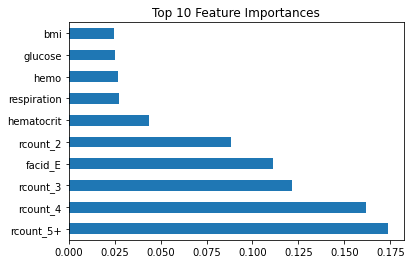

In [41]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()